<a href="https://colab.research.google.com/github/sfsernao/Bootcamp_BSU_MIT/blob/main/Fourier_Transform_Laser_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Aim Photonics Academy
#INPHO-BOOT 2023

Estimation of the pulse duration using the spectral information


In [80]:
# Importing the different packages
from typing import Dict
from typing import List
from typing import Tuple
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy.fft import rfft, rfftfreq
plt.rcParams['figure.figsize'] = [12, 7]

In [81]:
filename="/content/Team_B_1-17-24_Spectral_Analysis_2d.csv"  #Edit this! Make sure it has been uploaded. /
# Remember to save copies of your plots in your google drive so you can access the plots later

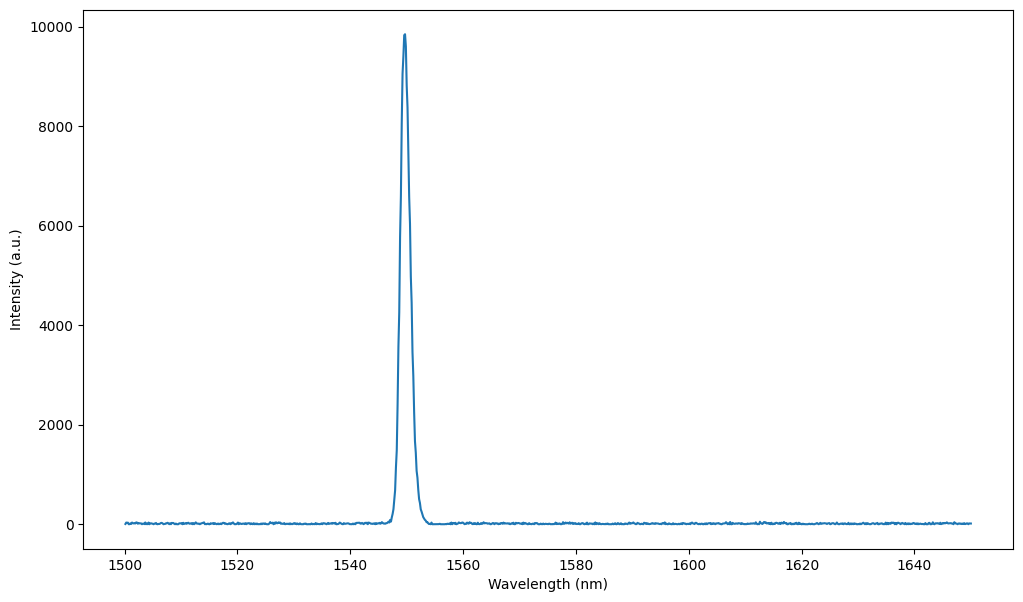

In [82]:
# Plot in linear domain of the spectral domain
data=pd.read_csv(filename, skiprows=1, skip_blank_lines=True, header=None)

dataX=np.array(data.iloc[1:][0])   # Definition of the array for the wavelenghts in nanometers
dataY=np.array(data.iloc[1:][1])   # Definition of the intensity in arbitrary units

# Plotting the data
fig, ax=plt.subplots()
ax.plot(dataX,dataY)
# Defining the labels
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Intensity (a.u.)')

textstr = None



/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Time vs FT of Signal')

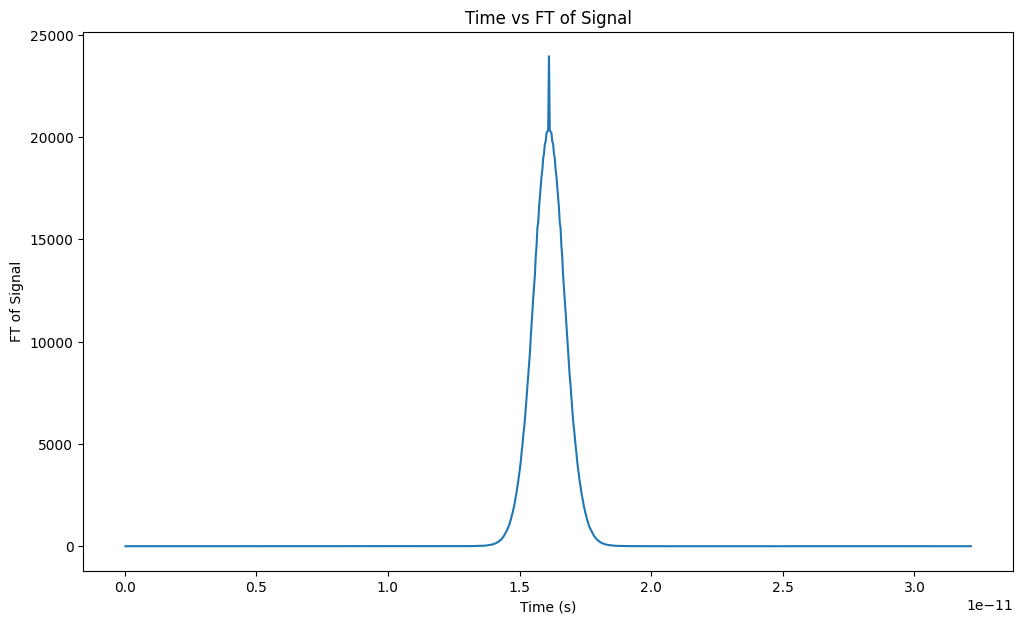

In [95]:
## Plot of the Fourier Transform
n=len(dataY)
dlambda=1500.293255-1500.146628


#acc=dataY.values.flatten() #to convert DataFrame to 1D array
#acc value must be in numpy array format for half way mirror calculation

# Calculating frequency and time
frequency = 3E8 / (dataX*1E-9)
#time = 1 / frequency
dt = 2*np.pi/max(frequency)
time = np.arange(1, len(frequency) + 1) * dt

# Fourier transform of the signal
FT_signal = np.fft.ifftshift(np.fft.ifft(np.fft.ifftshift(dataY)))

# Plotting time vs Fourier-transformed signal
plt.figure()
plt.plot(time, FT_signal*np.conj(FT_signal))  # plotting only the real part of the signal
plt.xlabel('Time (s)')
plt.ylabel('FT of Signal')
plt.title('Time vs FT of Signal')



In [104]:
# Finding the FWHM in the intensity domain which is related to the autocorrelation

Intensity_FFT=FT_signal*np.conj(FT_signal)

# 1. Find the peak value and its index
peak_value = np.max(Intensity_FFT)
peak_index = np.argmax(Intensity_FFT)

# 2. Determine half maximum
half_max = peak_value / 2

# 3. Find the points where the signal first drops below half-max on each side of the peak
left_index = np.where(Intensity_FFT[:peak_index] <= half_max)[0][-1]
right_index = np.where(Intensity_FFT[peak_index:] <= half_max)[0][0] + peak_index

# 4. Calculate FWHM
FWHM = time[right_index] - time[left_index]

print("FWHM:", FWHM)

# In seconds
# Be careful as this is a VERY rough estimation and only gives an order of magnitude of the pulse duration assuming, among other, a Fourier limited pulse. For a more precise measurement you should use methods like Frequency-resolved Optical Gating FROG: https://www.rp-photonics.com/frequency_resolved_optical_gating.html


FWHM: 1.256759900221944e-12
